In [5]:
#read in images
# ============================================================================
# import modules
# ============================================================================
# Note that this part of the code needs to be run prior to any other code cell

import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.animation as animation
from IPython.display import HTML
from mpl_toolkits import mplot3d
from scipy.fftpack import fft, ifft
from sklearn.decomposition import PCA

# inline plots
%matplotlib inline

In [6]:
# ============================================================================
# data loading
# ============================================================================

# PLEASE, SPECIFY YOUR PATH TO THE DATA HERE
datapath = 'BAll_tiffs'

# get the list of files to process
filelist = sorted(glob.glob('/'.join((datapath,'*.tif'))))

# get a list of images
imglist = [cv2.imread(imgfile,cv2.IMREAD_GRAYSCALE) for imgfile in filelist[:]]
imglistClass = [cv2.imread(imgfile,cv2.IMREAD_GRAYSCALE) for imgfile in filelist[:]]

In [7]:
ref = imglist[-10]
thres = 100
refBW = ref.copy()
for i in range(refBW.shape[0]):
    for j in range(refBW.shape[1]):
        if refBW[i,j] < 100:
            refBW[i,j] = 0
        else:
            refBW[i,j] = 255
plt.imshow(refBW)
plt.figure()
plt.imshow(ref)

IndexError: list index out of range

In [8]:
hc_control = np.loadtxt('HC_control.csv', delimiter=',')
hc_REH = np.loadtxt('HC_REH.csv', delimiter=',')
hc_Ball1 = np.loadtxt('HC_BALL1.csv', delimiter=',')
hc_MN60 = np.loadtxt('HC_MN60.csv', delimiter=',')
hc_RS411 = np.loadtxt('HC_RS411.csv', delimiter=',')

In [26]:
classMat = np.vstack((hc_control, hc_REH, hc_RS411, hc_Ball1, hc_MN60))

In [31]:
features = classMat[:,:6]
classes = classMat[:,6]

np.unique(classes)

array([1., 2., 3., 4., 5.])

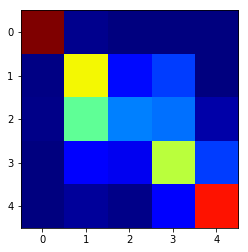

In [28]:
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
kf = KFold(n=len(classes), n_folds = 5, shuffle=True)
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

conf_RF_avg = np.zeros((5,5))

for i in range(1,10):
    for trainindex, testindex in kf:
        rclf = RandomForestClassifier(n_estimators=250, max_depth = 4, random_state=0, n_jobs=-1)
        rclf.fit(features[trainindex], classes[trainindex])
        rf_pred = rclf.predict(features[testindex])
        #print(rclf.score(features[testindex], classes[testindex]))
        conf_RF_avg += confusion_matrix(classes[testindex], rf_pred, labels = [5, 3,4,1,2])

    
plt.imshow(conf_RF_avg, cmap="jet")
plt.savefig("RF_confusion.pdf")

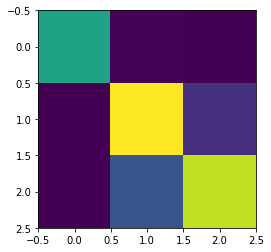

In [35]:
classes2 = classes
for element in range(1,len(classes)):
    if classes2[element] == 4.0:
        classes2[element] = 3.0
    if classes2[element] == 2.0:
        classes2[element] = 1.0
        
conf_RF_avg3 = np.zeros((3,3))
kf2 = KFold(n=len(classes2), n_folds = 5, shuffle=True)

for i in range(1,10):
    for trainindex, testindex in kf2:
        rclf2 = RandomForestClassifier(n_estimators=250, max_depth = 4, random_state=0, n_jobs=-1)
        rclf2.fit(features[trainindex], classes2[trainindex])
        rf_pred3 = rclf2.predict(features[testindex])
        #print(rclf.score(features[testindex], classes[testindex]))
        conf_RF_avg3 += confusion_matrix(classes2[testindex], rf_pred3, labels = [5,3,1])

    
plt.imshow(conf_RF_avg3)
plt.savefig("RF_confusion3cls.pdf")

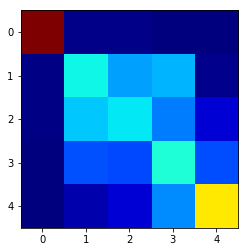

In [9]:
conf_KN_avg = np.zeros((5,5))
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,10):
    for trainindex, testindex in kf:
        knclf = KNeighborsClassifier()
        knclf.fit(features[trainindex], classes[trainindex])
        KN_pred = knclf.predict(features[testindex])
        #print(rclf.score(features[testindex], classes[testindex]))
        conf_KN_avg += confusion_matrix(classes[testindex], KN_pred, labels = [5, 3,4,1,2])

    
plt.imshow(conf_KN_avg, cmap="jet")
plt.savefig("KN_confusion.pdf")

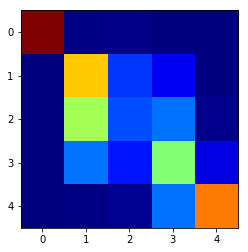

In [10]:
conf_GNB_avg = np.zeros((5,5))
from sklearn.naive_bayes import GaussianNB

for i in range(1,10):
    for trainindex, testindex in kf:
        GNBclf = GaussianNB()
        GNBclf.fit(features[trainindex], classes[trainindex])
        GNB_pred = GNBclf.predict(features[testindex])
        #print(rclf.score(features[testindex], classes[testindex]))
        conf_GNB_avg += confusion_matrix(classes[testindex], GNB_pred, labels = [5, 3,4,1,2])

    
plt.imshow(conf_GNB_avg, cmap="jet")
plt.savefig("GNB_confusion.pdf")

In [79]:
conf_GNB_avg

array([[3600.,    9.,   36.,    0.,    9.],
       [   0., 2457.,  675.,  360.,    9.],
       [   9., 1944.,  774.,  837.,   45.],
       [   0.,  828.,  576., 1836.,  306.],
       [   0.,   27.,   72.,  828., 2808.]])

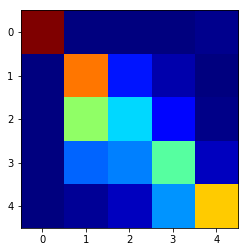

In [11]:
conf_QDA_avg = np.zeros((5,5))
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

for i in range(1,10):
    for trainindex, testindex in kf:
        QDAclf = QuadraticDiscriminantAnalysis()
        QDAclf.fit(features[trainindex], classes[trainindex])
        QDA_pred = QDAclf.predict(features[testindex])
        #print(rclf.score(features[testindex], classes[testindex]))
        conf_QDA_avg += confusion_matrix(classes[testindex], QDA_pred, labels = [5, 3,4,1,2])

    
plt.imshow(conf_QDA_avg, cmap="jet")
plt.savefig("QDA_confusion.pdf")

In [83]:
conf_QDA_avg

array([[3582.,   18.,    9.,    0.,   45.],
       [   9., 2772.,  567.,  153.,    0.],
       [   9., 1845., 1269.,  450.,   36.],
       [   0.,  819.,  918., 1602.,  207.],
       [   0.,   90.,  189.,  990., 2466.]])